<a href="https://colab.research.google.com/github/Faizaa01/Machine_Learning_Fundamentals/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,classification_report


In [ ]:
hours_studied = np.array([1, 2, 3, 4, 5, 6, 7,8, 9]).reshape(-1,1)
pass_exam = np.array([0,0,0,0,1,1,1,1,1])

toy_df = pd.DataFrame({
    'hours_studied': hours_studied.flatten(),
    'pass_exam': pass_exam
})
toy_df

,hours_studied,pass_exam
0,1,0
1,2,0
2,3,0
3,4,0
4,5,1
5,6,1
6,7,1
7,8,1
8,9,1


In [ ]:
toy_model = LogisticRegression()
toy_model.fit(hours_studied, pass_exam)
print("Incercept(b):", toy_model.intercept_)
print("Coeficientes(w):", toy_model.coef_)

Incercept(b): [-5.29559243]
Coeficientes(w): [[1.17808562]]


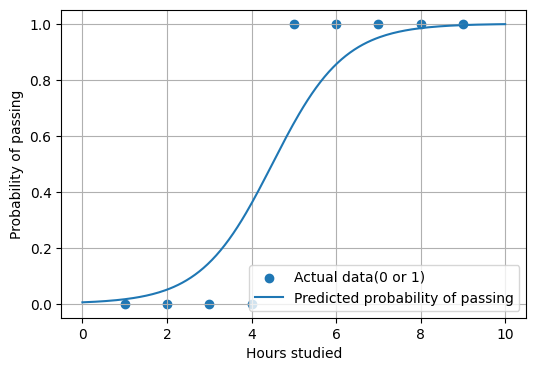

In [ ]:
hours_grid = np.linspace(0,10,200).reshape(-1,1)
pass_prob = toy_model.predict_proba(hours_grid)[:,1]
plt.figure(figsize=(6,4))
plt.scatter(hours_studied, pass_exam, label="Actual data(0 or 1)")
plt.plot(hours_grid, pass_prob, label = "Predicted probability of passing")
plt.xlabel("Hours studied")
plt.ylabel("Probability of passing")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
exm_hours = np.array([[2],[4],[6],[8]])
exm_probs = toy_model.predict_proba(exm_hours)[:,1]
exm_pred = toy_model.predict(exm_hours)

results_df = pd.DataFrame({
    'Hours studied': exm_hours.flatten(),
    'Probability of passing': np.round(exm_probs, 4),
    'Predicted pass': exm_pred
})
results_df

,Hours studied,Probability of passing,Predicted pass
0,2,0.0502,0
1,4,0.3582,0
2,6,0.8548,1
3,8,0.9842,1


In [ ]:
def sigmoid(z):
  return 1/(1+np.exp(-z))

z_values = np.array([-5, -2, -1, 0, 1, 2, 5], dtype=float)
sig_values = sigmoid(z_values)

sig_df = pd.DataFrame({
    "z": z_values,
    "sigmoid(z)": np.round(sig_values, 4)
})
sig_df

,z,sigmoid(z)
0,-5.0,0.0067
1,-2.0,0.1192
2,-1.0,0.2689
3,0.0,0.5000
4,1.0,0.7311
5,2.0,0.8808
6,5.0,0.9933


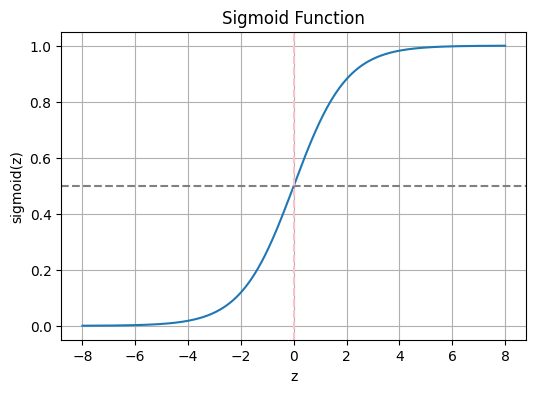

In [ ]:
z_grid = np.linspace(-8,8,400)
sig_grid = sigmoid(z_grid)
plt.figure(figsize=(6,4))
plt.plot(z_grid, sig_grid)
plt.xlabel("z")
plt.ylabel("sigmoid(z)")
plt.title("Sigmoid Function")
plt.grid(True)
plt.axhline(0.5, color="gray", linestyle="--")
plt.axvline(0, color="pink", linestyle="--")
plt.show()

In [ ]:
probabilities = np.array([0.1, 0.3, 0.49, 0.5, 0.7, 0.9])
threshold = 0.25
pred_class = (probabilities >= threshold).astype(int)

threshold_df = pd.DataFrame({
    "Probability": probabilities,
    "Class at threshold 0.5": pred_class
})
threshold_df

,Probability,Class at threshold 0.5
0,0.10,0
1,0.30,1
2,0.49,1
3,0.50,1
4,0.70,1
5,0.90,1


In [ ]:
data = load_breast_cancer()
X_full = data.data
y_full = data.target
print(data.target_names)
print(X_full.shape)
print(y_full.shape)
feature_names = data.feature_names
df = pd.DataFrame(X_full, columns=feature_names)
df["target"] = y_full
df.head()

['malignant' 'benign']
(569, 30)
(569,)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
print(df["target"].value_counts())
df.describe()

target
1    357
0    212
Name: count, dtype: int64


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_full, y_full, test_size=0.2, random_state=42
)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = LogisticRegression(max_iter=100)
clf.fit(X_train_scaled, y_train)

y_test_pred = clf.predict(X_test_scaled)
y_test_prob = clf.predict_proba(X_test_scaled)[:,1]
print("Test Accuracy: ", accuracy_score(y_test, y_test_pred))

cm = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:")
print(cm)
print("Classification Report:")
print(classification_report(y_test, y_test_pred))

Test Accuracy:  0.9736842105263158
Confusion Matrix:
[[41  2]
 [ 1 70]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



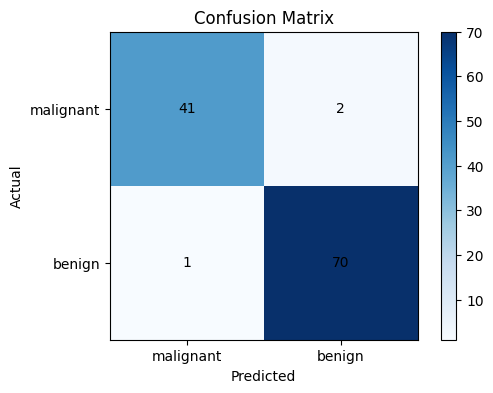

In [ ]:
plt.figure(figsize=(6,4))
plt.imshow(cm, cmap="Blues")
plt.title("Confusion Matrix")
plt.colorbar()
tick_labels = data.target_names
plt.xticks([0,1], tick_labels)
plt.yticks([0,1], tick_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")

for i in range(2):
  for j in range(2):
    plt.text(j,i, cm[i,j], ha="center", va="center", color = "black")

In [ ]:
acc = accuracy_score(y_test, y_test_pred)
prec = precision_score(y_test, y_test_pred)
rec = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

print("Accuracy: ", acc)
print("Precision: ", prec)
print("Recall: ", rec)
print("F1 Score: ", f1)

Accuracy:  0.9736842105263158
Precision:  0.9722222222222222
Recall:  0.9859154929577465
F1 Score:  0.9790209790209791


In [ ]:
thresholds = np.linspace(0.1, 0.9, 9)
rows = []

for thr in thresholds:
  y_thr_pred = (y_test_prob >= thr).astype(int)
  acc_thr = accuracy_score(y_test, y_thr_pred)
  pred_thr = precision_score(y_test, y_thr_pred)
  rec_thr = recall_score(y_test, y_thr_pred)
  f1_thr = f1_score(y_test, y_thr_pred)
  rows.append([thr, acc_thr, pred_thr, rec_thr, f1_thr])

thr_df = pd.DataFrame(rows, columns=["threshold", "accuracy", "precision", "recall", "F1"])
thr_df

,threshold,accuracy,precision,recall,F1
0,0.1,0.956140,0.934211,1.000000,0.965986
1,0.2,0.973684,0.959459,1.000000,0.979310
2,0.3,0.982456,0.972603,1.000000,0.986111
3,0.4,0.982456,0.972603,1.000000,0.986111
4,0.5,0.973684,0.972222,0.985915,0.979021
5,0.6,0.982456,0.985915,0.985915,0.985915
6,0.7,0.956140,0.985294,0.943662,0.964029
7,0.8,0.956140,0.985294,0.943662,0.964029
8,0.9,0.929825,0.984615,0.901408,0.941176


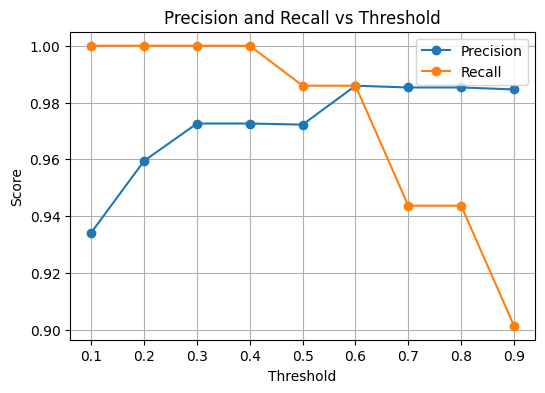

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(thr_df["threshold"], thr_df["precision"], marker="o", label="Precision")
plt.plot(thr_df["threshold"], thr_df["recall"], marker="o", label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision and Recall vs Threshold")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
clf_weak_reg = LogisticRegression(max_iter=100, C=1000.0)
clf_strong_reg = LogisticRegression(max_iter=100, C=0.01)

clf_weak_reg.fit(X_train_scaled, y_train)
clf_strong_reg.fit(X_train_scaled, y_train)

y_pred_weak = clf_weak_reg.predict(X_test_scaled)
y_pred_strong = clf_strong_reg.predict(X_test_scaled)

print("Weak red(c=1000) test accuracy: ", accuracy_score(y_test, y_pred_weak))
print("Strong red(c=0.01) test accuracy: ", accuracy_score(y_test, y_pred_strong))


Weak red(c=1000) test accuracy:  0.9385964912280702
Strong red(c=0.01) test accuracy:  0.9649122807017544


In [ ]:
coef_weak = clf_weak_reg.coef_[0]
coef_strong = clf_strong_reg.coef_[0]

coef_df = pd.DataFrame({
    "feature": feature_names,
    "coef_weak_C_1000": coef_weak,
    "coef_strong_C_0.01": coef_strong
})
coef_df.head()

,feature,coef_weak_C_1000,coef_strong_C_0.01
0,mean radius,3.744056,-0.207840
1,mean texture,-5.140148,-0.183925
2,mean perimeter,7.213172,-0.206185
3,mean area,-2.144036,-0.192726
4,mean smoothness,1.591682,-0.091815


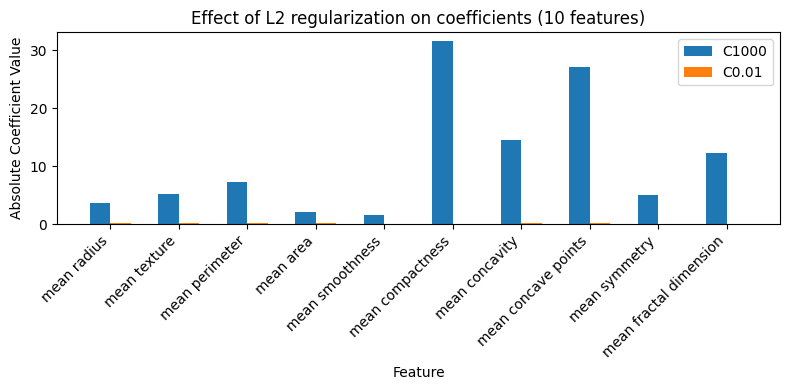

In [ ]:
n_plot = 10
indices = np.arange(n_plot)

plt.figure(figsize=(8,4))
plt.bar(indices - 0.15, np.abs(coef_weak[:n_plot]), width=0.3, label="C1000")
plt.bar(indices + 0.15, np.abs(coef_strong[:n_plot]), width=0.3, label="C0.01")
plt.xticks(indices, feature_names[:n_plot], rotation=45, ha="right")
plt.xlabel("Feature")
plt.ylabel("Absolute Coefficient Value")
plt.title("Effect of L2 regularization on coefficients (10 features)")
plt.legend()
plt.tight_layout()
plt.show()